# Machine Learning Assignment 1: An Investigation into the Infrared Thermography Temperature Dataset

# Introduction

The investigation aimes to conduct both regression task and classification task on The Infrared Thermography Temperature Dataset. 

The overall goal of this project is to develop a model that predict, the oral temperature measured in fast mode and in monitor mode. This involves building different model and finding the most predictive features.

I will assess the model's performance using cross-validation, a robust statistical method that maximizes the use of available data by iteratively splitting the dataset into training and validation subsets. This practice helps in estimating the performance of the model on unseen data, thereby ensuring that the model generalizes well and does not overfit to particular quirks of the training data.

By the end of this investigation, I aim to have a optimal model tuned to offer the highest predictive accuracy on the Infrared Thermography Temperature Dataset. This report will detail the steps taken in the investigation, the implementation of training, evaluation, the results obtained, and discussion.

# Methodology
## Step 1: Define the Problem and Assemble a Dataset
When dealing with the Infrared Thermography Temperature Dataset, one must first define the specific problem to be solved. In the context provided, the problem is twofold: predicting oral temperature from infrared thermographic images and determining whether the temperature indicates a fever. The dataset, which could be sourced from repositories like the UCI Machine Learning Repository, contains thermal readings from various locations on patients' bodies and correlates these with oral temperatures.

The assembled dataset includes 33 input features:

- Gender
- Age
- Ethnicity
- Ambient Temperature
- Humidity
- Distance
- Other temperature readings from the thermal images.

The output variable is dual-faceted:

- Oral Temperature in Fast Mode: A quick temperature reading.
- Oral Temperature in Monitor Mode: A more stable and sustained temperature reading.

To predict fever, a binary classification is done where an oral temperature of 37.5°C or higher is indicative of fever. This setup allows the problem to be treated both as a regression problem (predicting the exact oral temperature) and a classification problem (determining whether the temperature crosses the threshold for fever).

Once the problem has been identified as such, one must select an appropriate model architecture that can handle both regression and classification tasks effectively and choose evaluation metrics that reflect the performance objectives.

## Step 2: Choose a Evaluation Metric
Choosing the right evaluation metric is crucial for gauging the performance of the model. For the regression aspect of predicting oral temperature, metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or Mean Squared Error (MSE) could be appropriate. These metrics will provide insight into the average error magnitude between the predicted and actual temperatures.

For assessing the classification performance in identifying fever, metrics such as accuracy, precision, recall, and F1-score are appropriate. These measures will aid in evaluating the model's proficiency in accurately distinguishing between patients with and without fever. 

Given the medical context, recall becomes a pivotal metric due to the potential severe implications of overlooking actual cases of fever. Precision also holds significance; a high rate of false positives could lead to public frustration. Moreover, since there exists a balance to be maintained between recall and precision, the F1 score becomes a vital metric for comprehensive evaluation.

## Step 3: Decide on a Evaluation Protocol
The evaluation protocol defines how the model will be assessed. This often includes splitting the dataset into training, validation, and test sets to ensure that the model can generalize well to new, unseen data. Cross-validation techniques such as k-fold cross-validation may also be employed to make the most efficient use of the data for training and evaluation.

## Step 4: Prepare the Data


In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets 
combined_df = pd.concat([X, y], axis=1)
  
# variable information 
print(infrared_thermography_temperature.variables) 


           name     role         type demographic  \
0     SubjectID       ID  Categorical        None   
1      aveOralF   Target   Continuous        None   
2      aveOralM   Target   Continuous        None   
3        Gender  Feature  Categorical      Gender   
4           Age  Feature  Categorical         Age   
5     Ethnicity  Feature  Categorical   Ethnicity   
6         T_atm  Feature   Continuous        None   
7      Humidity  Feature   Continuous        None   
8      Distance  Feature   Continuous        None   
9     T_offset1  Feature   Continuous        None   
10    Max1R13_1  Feature   Continuous        None   
11    Max1L13_1  Feature   Continuous        None   
12  aveAllR13_1  Feature   Continuous        None   
13  aveAllL13_1  Feature   Continuous        None   
14        T_RC1  Feature   Continuous        None   
15    T_RC_Dry1  Feature   Continuous        None   
16    T_RC_Wet1  Feature   Continuous        None   
17    T_RC_Max1  Feature   Continuous        N

In [2]:
print(X.head())
print(X.info())

   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHCC1  T_FHRC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.5775  33.4775   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0325  34.0550   
2     0.8625    35.6525    35.5175      34.2775  ...  34.9000  34.8275   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4400  34.4225   
4     0.8950    35.5450    35.6650      34.9100  ...  35.0900  35.1600   

   T_FHLC1  T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  \
0  33.3725  33.4925  33.0025    34.53

In [4]:
print(y.head())
print(y.info())

   aveOralF  aveOralM
0     36.85     36.59
1     37.00     37.19
2     37.20     37.34
3     36.85     37.09
4     36.80     37.04
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aveOralF  1020 non-null   float64
 1   aveOralM  1020 non-null   float64
dtypes: float64(2)
memory usage: 16.1 KB
None


### 4.1: Explore the Data Structure

Except the columns of Gender, Age, 
Ethnictyi are categorical, the rest of the columns are numerical. And there is no missing value in this dataset. 

We will explore the distribution of the data to get a better understanding of the dataset.

In [5]:
X.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


In [6]:
combined_df['Gender'].value_counts()

Gender
Female    606
Male      414
Name: count, dtype: int64

In [7]:
combined_df['Ethnicity'].value_counts()

Ethnicity
White                                506
Asian                                260
Black or African-American            143
Hispanic/Latino                       57
Multiracial                           50
American Indian or Alaskan Native      4
Name: count, dtype: int64

In [8]:
combined_df['Age'].value_counts()

Age
18-20    534
21-25    355
26-30     67
31-40     31
51-60     11
21-30     10
41-50      9
>60        3
Name: count, dtype: int64

As we can see in the previous section, Age columns **are significantly imbalanced**. 

Given this distribution, stratification usefulble should be used to ensure that eage group is adequately represented in both the training and testing datasets. This approach would help the model learn to predict outcomes across age groups.

However, after adopting the stratifiction on the data, the model performance becomes worse, particularly the classification model. Probably because not enough data to learn from those underpresented age group. **This is noted in the essay too. "Perhaps the most significant caveat to our results is the limited age range of the study population[1]."** Considering this, I won't do the stratification here. This will be further discussed in the Limitation section.

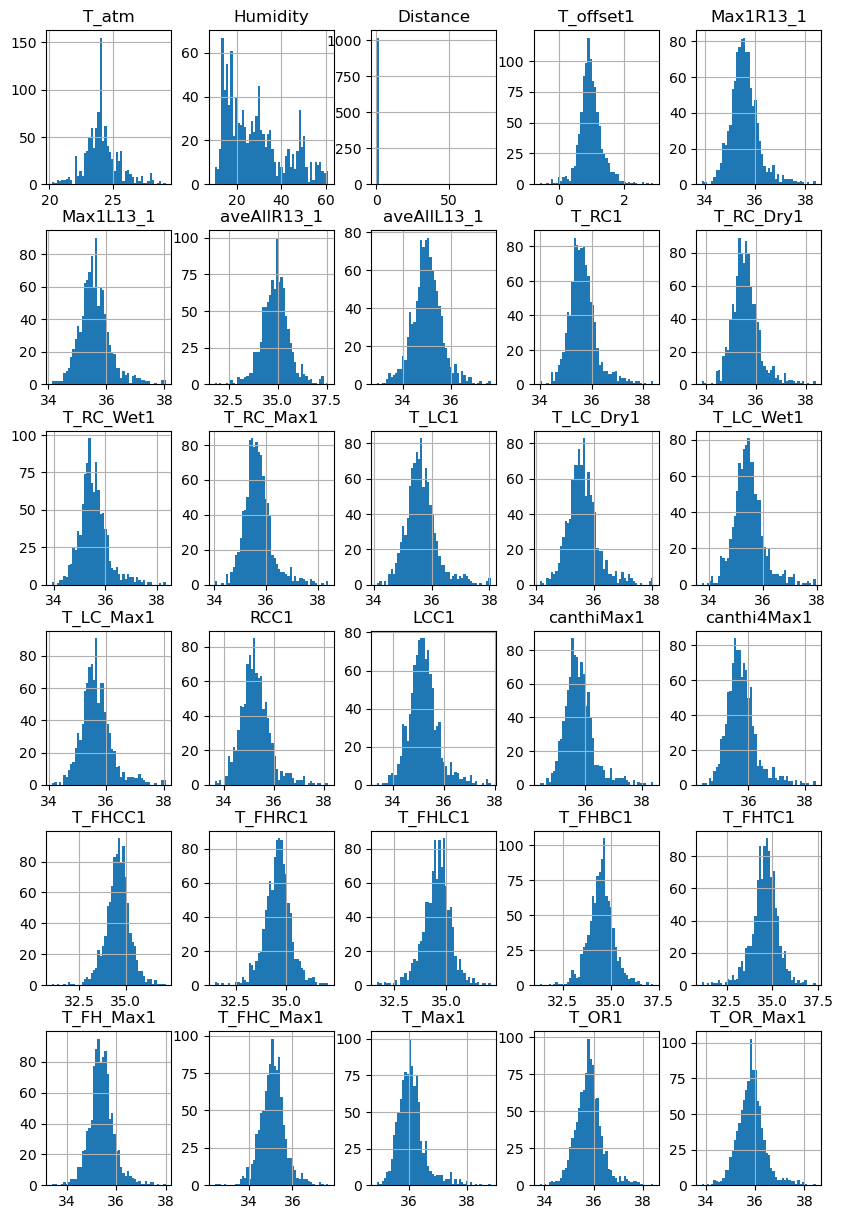

In [9]:
import matplotlib.pyplot as plt

X.hist(bins=50, figsize=(10,15))
plt.show()

### 4.2 Create a train-test split set

Use 80/20 split to create a train-test split set. Train set is use for train and validation, and test set is for the evaluation for final model.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
743,Female,18-20,White,23.8,24.4,0.65,1.270,35.743333,35.723333,35.103333,...,35.193333,35.133333,35.4100,35.1000,35.3000,35.8200,35.713333,36.0800,35.623333,35.6700
137,Female,21-25,Black or African-American,24.1,25.9,0.79,0.965,35.715000,35.400000,35.247500,...,34.362500,34.212500,34.4175,34.4450,34.4050,34.9525,34.807500,36.0325,35.977500,36.0175
799,Male,21-25,White,28.6,49.2,0.60,2.535,38.082500,38.042500,37.575000,...,37.125000,37.075000,37.1650,37.2125,37.3675,38.0025,37.632500,38.1450,37.875000,37.9025
933,Male,21-25,Black or African-American,23.9,19.3,0.64,0.905,35.975000,36.297500,35.232500,...,35.210000,35.325000,35.2575,35.1700,35.4225,36.1450,35.622500,37.0325,36.992500,37.0325
822,Female,18-20,White,24.5,23.1,0.60,1.110,35.535000,35.212500,34.747500,...,33.587500,33.557500,33.5675,33.4800,33.9975,35.1400,34.145000,35.5925,35.365000,35.3950


In [12]:
X_test.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
523,Male,41-50,Black or African-American,24.1,30.2,0.70,0.807500,35.277500,35.400000,34.6550,...,34.440000,34.4750,34.380000,34.482500,34.2575,35.162500,35.1375,36.032500,35.9975,36.017500
602,Male,31-40,White,23.4,15.1,0.70,0.972500,35.072500,34.757500,34.4325,...,33.875000,33.5750,33.732500,33.795000,33.7875,34.580000,34.3500,35.452500,35.3350,35.367500
526,Female,18-20,White,25.4,28.2,0.65,1.150000,35.337500,35.837500,34.5050,...,34.567500,33.9600,34.957500,33.600000,35.3875,36.175000,35.6600,36.320000,34.4575,34.492500
31,Male,>60,Asian,22.8,33.0,0.80,0.675000,35.050000,34.570000,34.5650,...,34.120000,33.8975,34.205000,34.112500,33.9800,34.712500,34.4950,35.727500,35.6925,35.727500
616,Male,26-30,Asian,23.8,20.6,0.60,0.763333,35.213333,35.463333,34.6600,...,34.713333,34.7300,34.756667,34.513333,34.8700,35.226667,35.0800,35.786667,35.6200,35.643333


### 4.3: Looking for correlations between numeric values

In [14]:
X_num_df = combined_df.drop(columns=['Gender', 'Age', 'Ethnicity'])
corr_matrix = X_num_df.corr()
print(corr_matrix['aveOralF'])

T_atm          0.070825
Humidity       0.047200
Distance       0.016166
T_offset1      0.117794
Max1R13_1      0.637134
Max1L13_1      0.621410
aveAllR13_1    0.534192
aveAllL13_1    0.540581
T_RC1          0.664154
T_RC_Dry1      0.643588
T_RC_Wet1      0.654099
T_RC_Max1      0.664864
T_LC1          0.633009
T_LC_Dry1      0.627341
T_LC_Wet1      0.611027
T_LC_Max1      0.633186
RCC1           0.611695
LCC1           0.586546
canthiMax1     0.673136
canthi4Max1    0.672514
T_FHCC1        0.433403
T_FHRC1        0.425942
T_FHLC1        0.399649
T_FHBC1        0.472456
T_FHTC1        0.382936
T_FH_Max1      0.560117
T_FHC_Max1     0.502194
T_Max1         0.752546
T_OR1          0.718840
T_OR_Max1      0.718513
aveOralF       1.000000
aveOralM       0.884728
Name: aveOralF, dtype: float64


In [15]:
print(corr_matrix['aveOralM'])

T_atm          0.098663
Humidity       0.063595
Distance       0.011181
T_offset1      0.139041
Max1R13_1      0.741902
Max1L13_1      0.735644
aveAllR13_1    0.620874
aveAllL13_1    0.645084
T_RC1          0.768730
T_RC_Dry1      0.748566
T_RC_Wet1      0.760134
T_RC_Max1      0.769463
T_LC1          0.750390
T_LC_Dry1      0.743656
T_LC_Wet1      0.720383
T_LC_Max1      0.750527
RCC1           0.714193
LCC1           0.696752
canthiMax1     0.784096
canthi4Max1    0.783763
T_FHCC1        0.513335
T_FHRC1        0.514298
T_FHLC1        0.463579
T_FHBC1        0.552362
T_FHTC1        0.454889
T_FH_Max1      0.641727
T_FHC_Max1     0.595470
T_Max1         0.849657
T_OR1          0.767345
T_OR_Max1      0.766911
aveOralF       0.884728
aveOralM       1.000000
Name: aveOralM, dtype: float64


- High Correlation with Target Variable: Features like T_Max1, T_OR1, T_OR_Max1, canthiMax1, and canthi4Max1 show high correlations with the target variable. It indicates they are strongly related to the target variable. These features could be particularly important for predicting aveOralF.
Let's plot scatter plots of the highly correlated features against the target variable to visually explore their relationships. This can help identify patterns, outliers, or non-linear relationships not captured by the correlation coefficient.

- Moderate to High Correlations: A significant number of features, such as T_RC1, T_RC_Dry1, T_RC_Wet1, T_RC_Max1, T_LC1, T_LC_Dry1, and others, exhibit moderate to high correlations. This suggests that they also carry valuable information for modeling.

- Lower Correlation Values: Some features, like T_atm, Humidity, and Distance, have relatively low correlation coefficients, which might imply they have less direct influence on aveOralF. But they should not be disregarded, as they could still provide useful information when combined with other features.

array([[<Axes: xlabel='T_Max1', ylabel='T_Max1'>,
        <Axes: xlabel='T_OR1', ylabel='T_Max1'>,
        <Axes: xlabel='T_RC1', ylabel='T_Max1'>,
        <Axes: xlabel='aveOralF', ylabel='T_Max1'>,
        <Axes: xlabel='aveOralM', ylabel='T_Max1'>],
       [<Axes: xlabel='T_Max1', ylabel='T_OR1'>,
        <Axes: xlabel='T_OR1', ylabel='T_OR1'>,
        <Axes: xlabel='T_RC1', ylabel='T_OR1'>,
        <Axes: xlabel='aveOralF', ylabel='T_OR1'>,
        <Axes: xlabel='aveOralM', ylabel='T_OR1'>],
       [<Axes: xlabel='T_Max1', ylabel='T_RC1'>,
        <Axes: xlabel='T_OR1', ylabel='T_RC1'>,
        <Axes: xlabel='T_RC1', ylabel='T_RC1'>,
        <Axes: xlabel='aveOralF', ylabel='T_RC1'>,
        <Axes: xlabel='aveOralM', ylabel='T_RC1'>],
       [<Axes: xlabel='T_Max1', ylabel='aveOralF'>,
        <Axes: xlabel='T_OR1', ylabel='aveOralF'>,
        <Axes: xlabel='T_RC1', ylabel='aveOralF'>,
        <Axes: xlabel='aveOralF', ylabel='aveOralF'>,
        <Axes: xlabel='aveOralM', ylabel='a

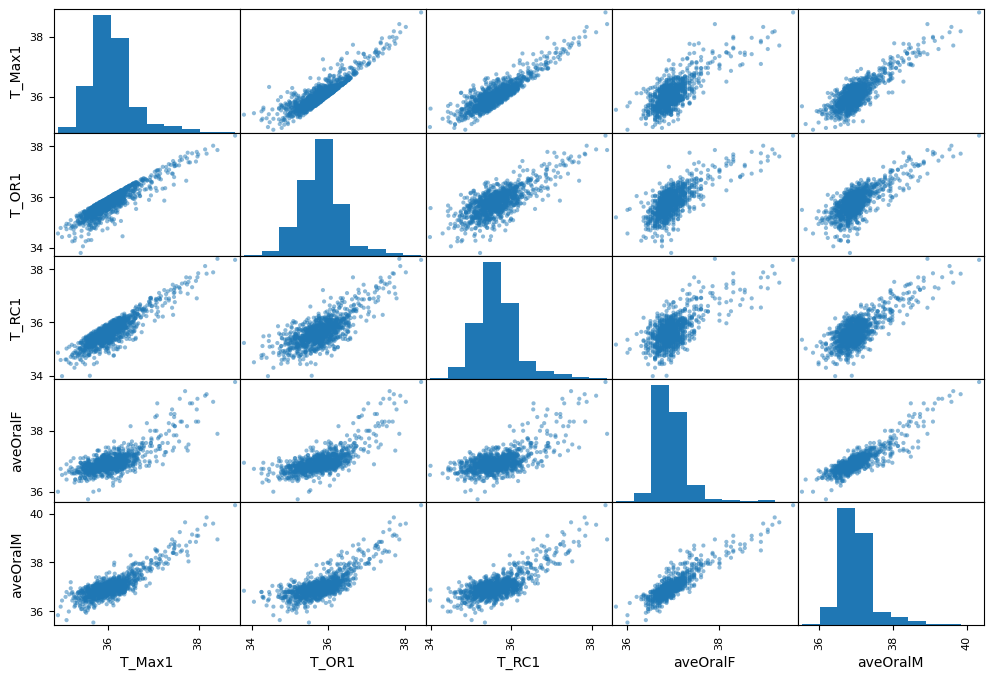

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["T_Max1", "T_OR1", "T_RC1",
              "aveOralF", "aveOralM"]
scatter_matrix(combined_df[attributes], figsize=(12, 8))

## 4.4: Prepare Data
Here are the data preprocessing practices used:

1. Data Cleaning:
   - Handling missing val.ls.
   - Identifying and handling outl.hem.

2. Data Transformation:
   - Standardization/Normalization: Transform numerical data to have a standardized range or distr.zation.
   - Encoding categorical data: Convert categorical data into a numeric form that models can undeinclude One-Hot Eare used in this reportEncoding.
F. Data t features.
   - Dimensionality reduction: Use algorithms like Principal Component Analysis (PCA) to reduce the dataset's dimensions while retaining as much of the original data's . However, after using PCA, my model performance becomes much more worse. So use permutation importance on the final model instead.s possible.

4. Developing Processing Pipelines:
   - For numerical data: Create a processing pipeline to standardize or normalize data and possibly perform feature selection or dimensionality reduction.
   - For categorical data: Develop a processing pipeline to encode categorical data and handleorithm efficiency.


In [15]:
# see if there any empty columns
incomplete_rows = X_train[X_train.isnull().any(axis=1)].head()
print(incomplete_rows)

     Gender    Age Ethnicity  T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
903    Male  18-20     White   23.9      15.3       NaN     0.7775     35.620   
902  Female  18-20     White   23.9      15.3       NaN     0.8100     35.735   

     Max1L13_1  aveAllR13_1  ...  T_FHCC1  T_FHRC1  T_FHLC1  T_FHBC1  T_FHTC1  \
903    35.6275      34.3650  ...  33.4375    33.59   33.840  33.1125    33.35   
902    35.4150      35.0525  ...  34.5750    34.73   34.675  34.7075    34.77   

     T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  
903    34.8675     34.4825  36.3350  36.0425     36.080  
902    35.3900     35.1925  36.0075  35.8675     35.895  

[2 rows x 33 columns]


The result indicates that there is no missing value in the dataset.

In [16]:
X_train_num = X_train.drop(columns=['Gender', 'Age','Ethnicity'])
X_train_cat = X_train[['Gender', 'Age', 'Ethnicity']]

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

In [118]:
imputer.statistics_

array([24.        , 26.4       ,  0.62      ,  0.945     , 35.5375    ,
       35.56625   , 34.90625   , 34.9975    , 35.5925    , 35.525     ,
       35.48375   , 35.625     , 35.595     , 35.565     , 35.41625   ,
       35.6175    , 35.2075    , 35.16      , 35.7075    , 35.68      ,
       34.58375   , 34.595     , 34.60125   , 34.5       , 34.6225    ,
       35.39875   , 35.09375   , 36.0275    , 35.79375   , 35.82583335])

In [18]:
from sklearn.preprocessing import OneHotEncoder

one_hot_df = X_train_cat[['Gender', 'Ethnicity']]
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoded = one_hot_encoder.fit_transform(one_hot_df)
one_hot_encoded.toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])
X_train_num_tr = num_pipeline.fit_transform(X_train_num)

In [20]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", one_hot_encoder, cat_attribs),
])
preprocessed_X_train = full_pipeline.fit_transform(X_train)
# preprocess the test set too
preprocessed_X_test = full_pipeline.transform(X_test)

In [21]:
preprocessed_X_train

array([[-2.24923386e-01, -3.50950401e-01, -3.63782021e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-2.99172581e-03, -2.37119600e-01,  1.46826876e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.32598317e+00,  1.53105216e+00, -5.46142341e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 7.09854942e-02, -8.13862321e-01, -4.73198213e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.43825653e+00,  5.44518560e-01, -3.63782021e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.24923386e-01, -7.83507441e-01, -5.46142341e-02, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [22]:
preprocessed_X_train.shape

(816, 46)

In our classification task, the objective is to distinguish between instances with a temperature exceeding 37.5°C (classified as having a fever) and those with a temperature below this threshold (classified as normal). Consequently, the training labels (y) have been encoded as binary values, with 1 representing the presence of a fever and 0 indicating normal temperature readings. For the regression task, the data is utilized in its original form, allowing for a more nuanced understanding of temperature variations without the imposition of a binary framework. 

In [23]:
from tensorflow.keras.utils import to_categorical
import numpy as np

y_train['feverOralF'] = np.where(y_train['aveOralF'] >= 37.5, 1, 0)
y_train['feverOralM'] = np.where(y_train['aveOralM'] >= 37.5, 1, 0)

y_train_feverF = y_train['feverOralF']
y_train_feverM = y_train['feverOralM']

y_train_reg = y_train[['aveOralF', 'aveOralM']]
y_train_clf = y_train[['feverOralF','feverOralM']]

y_test_feverF = y_test['aveOralF']
y_test_feverM = y_test['aveOralM']

print(y_train_feverF)

743    0
137    0
799    1
933    1
822    0
      ..
106    0
270    0
860    0
435    0
102    0
Name: feverOralF, Length: 816, dtype: int32


## Step 5: Train and Evaluate the Model
### 5.1 Regression Model

Upon completing the data preprocessing phase, our next step involves training the data across various machine learning algorithms. Given the nature of this task as a regression problem, we employ both the Mean Absolute Error (MAE) and the Root Mean Squared Error (RMSE) as metrics to assess model performance. Additionally, we leverage cross-validation scores to bolster the robustness of our evaluation methodology.

In [24]:
def display_scores(scores):
    print("Mean:", round(scores.mean(), 2))
    print("Scores:", np.round(scores, 2))
    print("Standard deviation:", round(scores.std(), 2))

#### 1. Linear Regressor

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(preprocessed_X_train, y_train_reg)

LinearRegression()

In [26]:
from sklearn.metrics import mean_absolute_error

lin_reg_predictions = lin_reg.predict(preprocessed_X_train)
lin_mae = mean_absolute_error(y_train_reg, lin_reg_predictions)
print(round(lin_mae, 2))

0.19


In [27]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, preprocessed_X_train, y_train_reg, n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
# use -lin_score here, becuase scoring method used is negative mean square error
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Mean: 0.39
Scores: [1.53 0.26 0.25 0.25 0.28 0.24 0.25 0.27 0.3  0.25]
Standard deviation: 0.38


|Model|RMSE|MAE| 
| --- | --- | --- |
|Linear Regression| 0.39 | 0.19 |

**Why choose RMSE AND MAE?**
**RMSE**
- In situations where large errors could have severe consequences, such as predicting the dosage of medication, an under or overestimation by a large margin could be fatal. RMSE would penalize these large errors more, making it a suitable metric to ensure model accuracy in critical predictions..- Medical data can sometimes include outliers due to rare conditions or anomalies in patient responses. When it's crucial not to underestimate the risk or severity of these rare events, RMSE's sensitivity to outliers ensures they influence model evaluation more significantly.r
**d.**r- Medical datasets often contain outliers due to variability in data collection errors. MAE is less sensitive to such outliers, making it a reliable metric when the goal is to develop a model that performs consistently across a wide range of patients without being unduly influenced by rare or extreme cases. error.

#### 2. K-nearest Neighbor Regressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor

neigh_reg = KNeighborsRegressor(n_neighbors=1)
neigh_reg.fit(preprocessed_X_train, y_train_reg)

KNeighborsRegressor(n_neighbors=1)

In [29]:
neigh_reg_predictions = neigh_reg.predict(preprocessed_X_train)
neigh_mae = mean_absolute_error(y_train_reg, neigh_reg_predictions)
print(neigh_mae)

0.0


In [30]:
neigh_scores = cross_val_score(neigh_reg, preprocessed_X_train, y_train_reg, n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
neigh_rmse_scores = np.sqrt(-neigh_scores)
display_scores(neigh_rmse_scores)

Mean: 0.34
Scores: [0.34 0.36 0.35 0.3  0.36 0.33 0.35 0.38 0.34 0.34]
Standard deviation: 0.02


|Model|RMSE|MAE| 
| --- | --- | --- |
|Linear Regression| 0.39 | 0.19 |
|K-nearest Neighbour|0.34|0

#### 3. Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(preprocessed_X_train, y_train_reg)

DecisionTreeRegressor(random_state=42)

The result shows the model overfits the data, we will try to tune the parameter.

In [32]:
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(preprocessed_X_train, y_train_reg)
tree_reg_predictions = tree_reg.predict(preprocessed_X_train)
tree_mae = mean_absolute_error(y_train_reg, tree_reg_predictions)
print(round(tree_mae, 2))

0.16


In [33]:
tree_scores = cross_val_score(tree_reg, preprocessed_X_train, y_train_reg, n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Mean: 0.28
Scores: [0.36 0.25 0.27 0.23 0.27 0.22 0.28 0.31 0.32 0.25]
Standard deviation: 0.04


|Model|RMSE|MAE| 
| --- | --- | --- |
|Linear Regression| 0.39 | 0.19 |
|K-nearest Neighbour|0.34|0
|Decision Tree|0.28|0.16

#### 4. Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(preprocessed_X_train, y_train_reg)

RandomForestRegressor(random_state=42)

In [35]:
forest_reg_predictions = forest_reg.predict(preprocessed_X_train)
forest_mae = mean_absolute_error(y_train_reg, forest_reg_predictions)
print(round(forest_mae, 2))

0.07


In [36]:
forest_scores = cross_val_score(forest_reg, preprocessed_X_train, y_train_reg, n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Mean: 0.25
Scores: [0.26 0.23 0.24 0.21 0.27 0.21 0.26 0.3  0.27 0.23]
Standard deviation: 0.03


|Model|RMSE|MAE| 
| --- | --- | --- |
|Linear Regression| 0.39 | 0.19 |
|K-nearest Neighbour|0.34|0
|Decision Tree|0.28|0.16
|Random Forest|0.25|0.07

#### 5. XGBoost Regressor

In [37]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb_reg.fit(preprocessed_X_train, y_train_reg)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [38]:
xgb_reg_predictions = xgb_reg.predict(preprocessed_X_train)
xgb_mae = mean_absolute_error(y_train_reg, xgb_reg_predictions)
print(round(xgb_mae, 2))

0.21


In [39]:
xgb_scores = cross_val_score(xgb_reg, preprocessed_X_train, y_train_reg, n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

Mean: 0.33
Scores: [0.43 0.29 0.27 0.25 0.36 0.27 0.41 0.41 0.35 0.26]
Standard deviation: 0.07


|Model|RMSE|MAE| 
| --- | --- | --- |
|Linear Regression| 0.39 | 0.19 |
|K-nearest Neighbour|0.34|0
|Decision Tree|0.28|0.16
|Random Forest|0.25|0.07
|XGBoost|0.33|0.21

#### 6. Gradient Boost Regressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

gb_reg = GradientBoostingRegressor(**params)
multi_gb_reg = MultiOutputRegressor(gb_reg)
multi_gb_reg.fit(preprocessed_X_train, y_train_reg)

MultiOutputRegressor(estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=4,
                                                         min_samples_split=5,
                                                         n_estimators=500))

In [41]:
gb_reg_predictions = multi_gb_reg.predict(preprocessed_X_train)
gb_mae = mean_absolute_error(y_train_reg, gb_reg_predictions)
print(round(gb_mae, 2))

0.12


In [42]:
gb_scores = cross_val_score(multi_gb_reg, preprocessed_X_train, y_train_reg, n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
gb_rmse_scores = np.sqrt(-gb_scores)
display_scores(gb_rmse_scores)

Mean: 0.26
Scores: [0.28 0.24 0.25 0.21 0.27 0.23 0.29 0.3  0.27 0.24]
Standard deviation: 0.03


|Model|RMSE|MAE| 
| --- | --- | --- |
|Linear Regression| 0.39 | 0.19 |
|K-nearest Neighbour|0.34|0
|Decision Tree|0.28|0.16
|Random Forest|0.25|0.07
|XGBoost|0.33|0.21
|Gradient Boost|0.26|0.12

#### Finetune the model using Random Search
In the phase of model selection, we specifically refine the Gradient Boosting Regressor since it has the best performance. Through a Randomized Search approach, we tried to optimizied it to yield the most favorable outcomes.

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
    'estimator__n_estimators': [100, 300, 500],
    'estimator__max_depth': randint(low=2, high=6),
    'estimator__min_samples_split': [5, 10],
    'estimator__learning_rate': [0.1, 0.01, 0.001],
}
rnd_search = RandomizedSearchCV(multi_gb_reg, param_distributions=params,
                               n_jobs=-1, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(preprocessed_X_train, y_train_reg)
print(rnd_search.best_params_)

{'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 300}


In [44]:
rnd_search_predictions = rnd_search.predict(preprocessed_X_train)
rnd_mae = mean_absolute_error(y_train_reg, gb_reg_predictions)
print(round(rnd_mae, 2))

0.12


In [45]:
rnd_scores = cross_val_score(rnd_search, preprocessed_X_train, y_train_reg, n_jobs=-1, scoring="neg_mean_squared_error", cv=10)
rnd_rmse_scores = np.sqrt(-rnd_scores)
display_scores(rnd_rmse_scores)

Mean: 0.26
Scores: [0.27 0.25 0.25 0.22 0.28 0.23 0.28 0.31 0.29 0.25]
Standard deviation: 0.03


|Model|RMSE|MAE| 
| --- | --- | --- |
|Linear Regression| 0.39 | 0.19 |
|K-nearest Neighbour|0.34|0
|Decision Tree|0.28|0.16
|Random Forest|0.25|0.07
|XGBoost|0.33|0.21
|Gradient Boost|0.26|0.12
|Finetuned Gradient Boost|0.26|0.12

#### 7. Neural Network

In [46]:
import tensorflow as tf

def build_reg_model():
    reg_model = tf.keras.models.Sequential()
    reg_model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(preprocessed_X_train.shape[1],)))
    reg_model.add(tf.keras.layers.Dense(32, activation='relu'))
    reg_model.add(tf.keras.layers.Dense(1))
    reg_model.compile(
        optimizer='rmsprop',
        loss='mean_squared_error',
        metrics=['mae'])
    return reg_model

def train_model(reg_model):
    history = reg_model.fit(preprocessed_X_train, y_train_reg, epochs=50, batch_size=64, validation_split=0.2)
    return history

reg_model = build_reg_model()
history = train_model(reg_model)

Epoch 1/50
11/11 [==============================] - 1s 15ms/step - loss: 1283.2484 - mae: 35.8039 - val_loss: 1188.5688 - val_mae: 34.4312
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 1122.6860 - mae: 33.3965 - val_loss: 1017.6412 - val_mae: 31.6936
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 948.3980 - mae: 30.4207 - val_loss: 836.3958 - val_mae: 28.2969
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 771.2151 - mae: 26.9356 - val_loss: 664.6614 - val_mae: 24.7298
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 614.3752 - mae: 23.4462 - val_loss: 529.6434 - val_mae: 21.5110
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 495.1150 - mae: 20.5668 - val_loss: 443.1170 - val_mae: 19.0379
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 427.2427 - mae: 18.6790 - val_loss: 412.2758 - val_mae: 18.1775
Epoch 8/50
11/11 [=========================

In [53]:
acc = history.history['mae']
print(acc)
val_acc = history.history['val_mae']
print(val_acc)

[35.1310920715332, 31.928741455078125, 28.162172317504883, 24.437183380126953, 21.1909236907959, 18.718772888183594, 16.93651008605957, 15.477943420410156, 13.922677993774414, 12.133501052856445, 10.229660034179688, 8.296262741088867, 6.404357433319092, 4.783324718475342, 3.4627010822296143, 2.7730441093444824, 2.3231916427612305, 2.065319538116455, 1.843589186668396, 1.6612844467163086, 1.554192066192627, 1.3914355039596558, 1.3442494869232178, 1.228460431098938, 1.1499727964401245, 1.1569894552230835, 1.0661704540252686, 1.0318658351898193, 0.9946366548538208, 1.0703208446502686, 0.8303524851799011, 0.9310629367828369, 0.9475102424621582, 0.7600771188735962, 0.7785393595695496, 0.872438371181488, 0.7234257459640503, 0.7804140448570251, 0.7433257699012756, 0.6530493497848511, 0.8313597440719604, 0.6303205490112305, 0.6775476932525635, 0.7199714779853821, 0.6330408453941345, 0.6571311950683594, 0.7034947872161865, 0.6475878953933716, 0.6474498510360718, 0.6780005693435669]
[33.515625, 

In [47]:
from sklearn.metrics import mean_squared_error
nn_prediction = reg_model.predict(preprocessed_X_train)
mse = mean_squared_error(y_train_reg['aveOralF'], nn_prediction)
rmse = np.sqrt(mse)
print(rmse)

26/26 [==============================] - 0s 680us/step
1.059686462472813


|Model|RMSE|MAE| 
| --- | --- | --- |
|Linear Regression| 0.39 | 0.19 |
|K-nearest Neighbour|0.34|0
|Decision Tree|0.28|0.16
|Random Forest|0.25|0.07
|XGBoost|0.33|0.21
|Gradient Boost|0.26|0.12
|Finetuned Gradient Boost|0.26|0.12
|Neural Network|0.66|0.67

Finally, to introduce a diverse set of predictions and enhance the model's overall performance, we combined the three most effective models—a finely-tuned Gradient Boosting Regressor, a Linear Regressor, and a XGBoost Regressor into a unified ensemble via a Voting Regressor. This strategic combination aims to leverage the strengths of each individual model, culminating in a robust and versatile final regressor.

#### 8. Ensemble the model: Multi-output voting Regressor

In [48]:
class MultiOutputVotingRegressor:
    def __init__(self, estimators):
        self.estimators = estimators

    def fit(self, X, y):
        for estimator in self.estimators:
            estimator.fit(X, y)
        return self

    def predict(self, X):
        predictions = np.array([estimator.predict(X) for estimator in self.estimators])
        avg_predictions = np.mean(predictions, axis=0)
        return avg_predictions

    def get_params(self, deep=True):
        return {'estimators': self.estimators}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self


multi_output_voting_regressor = MultiOutputVotingRegressor(estimators=[rnd_search, lin_reg, xgb_reg])
multi_output_voting_regressor.fit(preprocessed_X_train, y_train_reg) 

In [55]:
ens_scores = cross_val_score(multi_output_voting_regressor, preprocessed_X_train, y_train_reg, n_jobs=-1, scoring="neg_mean_squared_error", cv=3)
ens_rmse_scores = np.sqrt(-ens_scores)
display_scores(ens_rmse_scores)

Mean: 0.32
Scores: [0.44 0.27 0.27]
Standard deviation: 0.08


In [49]:
multi_predictions = multi_output_voting_regressor.predict(preprocessed_X_train)
multi_mae = mean_absolute_error(y_train_reg, multi_predictions)
print(round(multi_mae, 2))

0.12


|Model|RMSE|MAE| 
| --- | --- | --- |
|Linear Regression| 0.39 | 0.19 |
|K-nearest Neighbour|0.34|0
|Decision Tree|0.28|0.16
|Random Forest|0.25|0.07
|XGBoost|0.33|0.21
|Gradient Boost|0.26|0.12
|Finetuned Gradient Boost|0.26|0.12
|Neural Network|0.66|0.67
|Multi-output Voting Regressor|0.32|0.12

### 5.2 Train a binary classifer

In our binary classification task, we aim to distinguish between individuals with and without fever based on labeled target values. Similar to our approach in the regression task, we will **evaluate various models to identify the most effective solution**. Once the optimal model is determined, we will proceed to **finetune it for enhanced performance**. The final step involves **assembling the top-performing models into an ensemble**, thereby constructing a robust predictive framework capable of accurately classifying fever cases.

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
def scores(y_train, predictions):
    print("Accuracy:", round(accuracy_score(y_train, predictions), 2))
    print("Precision:", round(precision_score(y_train, predictions), 2))
    print("Recall:", round(recall_score(y_train, predictions), 2))
    print("F1:", round(f1_score(y_train, predictions), 2))

- Use Precision to minimizing false positives: High precision is crucial in this situation where the consequence of a false positive (such as unnecessary treatment or anxiety) is significant.
- Public health concerns: In outbreaks or screening programs, a high recall rate ensures that most individuals with the condition are identified, even at the expense of some false positives.
- The F1 is useful in medical diagnostics where both false negatives and false positives carry significant consequences.

#### 1. Stochastic Gradient Descend Classiffier

In [51]:
from sklearn.linear_model import SGDClassifier

sgd_clf_F= SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf_F.fit(preprocessed_X_train, y_train_feverF)


SGDClassifier(random_state=42)

In [27]:
cross_val_score(sgd_clf_F, preprocessed_X_train, y_train_feverF, cv=3, n_jobs=-1, scoring="accuracy")
predictions = sgd_clf_F.predict(preprocessed_X_train)
scores(y_train_feverF, predictions)

Accuracy: 0.97
Precision: 0.81
Recall: 0.67
F1: 0.74


|Classifier for Fast Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.81 | 0.67 | 0.74

In [52]:
sgd_clf_M = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf_M.fit(preprocessed_X_train, y_train_feverM)

SGDClassifier(random_state=42)

In [61]:
cross_val_score(sgd_clf_M, preprocessed_X_train, y_train_feverM, cv=3, n_jobs=-1, scoring="accuracy")
predictions = sgd_clf_M.predict(preprocessed_X_train)
scores(y_train_feverM, predictions)

Accuracy: 0.97
Precision: 0.87
Recall: 0.83
F1: 0.85


|Classifier for Monitor Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.87 | 0.83 | 0.85

#### 2. Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest_clf_F= RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf_F.fit(preprocessed_X_train, y_train_feverF)

prediction = cross_val_predict(forest_clf_F, preprocessed_X_train, y_train_feverF, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverF, predictions_binary)

Accuracy: 0.96
Precision: 0.71
Recall: 0.58
F1: 0.64


|Classifier for Fast Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.81 | 0.67 | 0.74
|Random Forest| 0.96 | 0.71 | 0.58|0.64

In [54]:
forest_clf_M= RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf_M.fit(preprocessed_X_train, y_train_feverM)

prediction = cross_val_predict(forest_clf_M, preprocessed_X_train, y_train_feverM, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverM, predictions_binary)

Accuracy: 0.95
Precision: 0.85
Recall: 0.69
F1: 0.76


|Classifier for Monitor Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.87 | 0.83 | 0.85
|Random Forest| 0.95| 0.85| 0.69|0.76

#### 3. Decision Tree Classifier

In [55]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

dt_clf_F = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf_F.fit(preprocessed_X_train, y_train_feverF)

prediction = cross_val_predict(dt_clf_F, preprocessed_X_train, y_train_feverF, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverF, predictions_binary)

Accuracy: 0.95
Precision: 0.63
Recall: 0.46
F1: 0.53


|Classifier for Fast Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.81 | 0.67 | 0.74
|Random Forest| 0.96 | 0.71 | 0.58|0.64
|Decision Tree| 0.95 | 0.63 | 0.46| 0.53

In [56]:
dt_clf_M = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf_M.fit(preprocessed_X_train, y_train_feverM)

prediction = cross_val_predict(dt_clf_M, preprocessed_X_train, y_train_feverM, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverM, predictions_binary)

Accuracy: 0.94
Precision: 0.77
Recall: 0.64
F1: 0.7


|Classifier for Monitor Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.87 | 0.83 | 0.85
|Random Forest| 0.95| 0.85| 0.69|0.76
|Decision Tree| 0.94 | 0.77 | 0.64 | 0.7

#### 4. XGBoost Classifier

In [57]:
# XGboost

xgb_clf_F = xgb.XGBClassifier()
xgb_clf_F.fit(preprocessed_X_train, y_train_feverF)

prediction = cross_val_predict(xgb_clf_F, preprocessed_X_train, y_train_feverF, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverF, predictions_binary)

Accuracy: 0.96
Precision: 0.72
Recall: 0.6
F1: 0.65


|Classifier for Fast Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.81 | 0.67 | 0.74
|Random Forest| 0.96 | 0.71 | 0.58|0.64
|Decision Tree| 0.95 | 0.63 | 0.46| 0.53
|XGBoost| 0.96 | 0.72 | 0.6|0.65

In [58]:
xgb_clf_M = xgb.XGBClassifier()
xgb_clf_M.fit(preprocessed_X_train, y_train_feverM)

prediction = cross_val_predict(xgb_clf_M, preprocessed_X_train, y_train_feverF, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverM, predictions_binary)

Accuracy: 0.94
Precision: 0.93
Recall: 0.46
F1: 0.62


|Classifier for Monitor Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.87 | 0.83 | 0.85
|Random Forest| 0.95 | 0.85| 0.69|0.76
|Decision Tree| 0.94 | 0.93 | 0.46 | 0.62
|XGBoost| 0.94 | 0.93 | 0.46 | 0.62

#### 5. Support Vector Machine Classifier

In [59]:
# support vector machine
from sklearn.svm import SVC

svm_clf_F = SVC(probability=True)
svm_clf_F.fit(preprocessed_X_train, y_train_feverF)

prediction = cross_val_predict(svm_clf_F, preprocessed_X_train, y_train_feverF, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverF, predictions_binary)

Accuracy: 0.96
Precision: 0.74
Recall: 0.5
F1: 0.6


|Classifier for Fast Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.81 | 0.67 | 0.74
|Random Forest| 0.96 | 0.71 | 0.58|0.64
|Decision Tree| 0.95 | 0.63 | 0.46| 0.53
|XGBoost| 0.96 | 0.72 | 0.6|0.65
|Support Vector Machine| 0.96 | 0.76 | 0.54 | 0.63

In [60]:
svm_clf_M = SVC(probability=True)
svm_clf_M.fit(preprocessed_X_train, y_train_feverM)

prediction = cross_val_predict(svm_clf_M, preprocessed_X_train, y_train_feverM, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverM, predictions_binary)

Accuracy: 0.96
Precision: 0.9
Recall: 0.7
F1: 0.79


|Classifier for Monitor Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.87 | 0.83 | 0.85
|Random Forest| 0.95 | 0.85| 0.69|0.76
|Decision Tree| 0.94 | 0.93 | 0.46 | 0.62
|XGBoost| 0.94 | 0.93 | 0.46 | 0.62
|Support Vector Machine| 0.96 | 0.9 | 0.7 | 0.79

#### 6. Neural Network

In [61]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision


input_layer = Input(shape=(preprocessed_X_train.shape[1],))
shared = Dense(64, activation='relu')(input_layer)
shared = Dropout(0.5)(shared)

out_feverF = Dense(1, activation='sigmoid', name='out_feverF')(shared)
out_feverM = Dense(1, activation='sigmoid', name='out_feverM')(shared)
model = Model(inputs=input_layer, outputs=[out_feverF, out_feverM])
model.compile(loss={'out_feverF':'binary_crossentropy', 'out_feverM':'binary_crossentropy'},
                    optimizer='Adam', metrics={'out_feverF': ['accuracy', Recall(), Precision()],
                                               'out_feverM': ['accuracy', Recall(), Precision()],
                                               })
model.fit(preprocessed_X_train, {'out_feverF': y_train_feverF, 'out_feverM': y_train_feverM}, epochs=100, batch_size=64)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 1.1438 - out_feverF_loss: 0.5422 - out_feverM_loss: 0.6016 - out_feverF_accuracy: 0.7635 - out_feverF_recall: 0.3077 - out_feverF_precision: 0.0925 - out_feverM_accuracy: 0.6581 - out_feverM_recall_1: 0.6552 - out_feverM_precision_1: 0.1863     
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.8850 - out_feverF_loss: 0.4360 - out_feverM_loss: 0.4490 - out_feverF_accuracy: 0.8664 - out_feverF_recall: 0.2692 - out_feverF_precision: 0.1647 - out_feverM_accuracy: 0.7855 - out_feverM_recall_1: 0.6552 - out_feverM_precision_1: 0.2822
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.7178 - out_feverF_loss: 0.3474 - out_feverM_loss: 0.3704 - out_feverF_accuracy: 0.8909 - out_feverF_recall: 0.4231 - out_feverF_precision: 0.2716 - out_feverM_accuracy: 0.8591 - out_feverM_recall_1: 0.7011 - out_feverM_precision_1: 0.4067    
Epoch 4/100
13/13 [==============================

| Classifier for Fast Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
| Stochastic Gradient Descend| 0.97 | 0.81 | 0.67 | 0.74
| Random Forest| 0.96 | 0.71 | 0.58|0.64
| Decision Tree| 0.95 | 0.63 | 0.46| 0.53
| XGBoost| 0.96 | 0.72 | 0.6|0.65
| Support Vector Machine| 0.96 | 0.76 | 0.54 | 0.63
| Neural Network| 0.98 | 0.85| 0.75 | 0.8

|Classifier for Monitor Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.87 | 0.83 | 0.85
|Random Forest| 0.95 | 0.85| 0.69|0.76
|Decision Tree| 0.94 | 0.93 | 0.46 | 0.62
|XGBoost| 0.94 | 0.93 | 0.46 | 0.62
|Support Vector Machine| 0.96 | 0.9 | 0.7 | 0.79
|Neural Network | 0.97 | 0.91 | 0.8 | 0.85

#### Grid search for best parameters

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_F = GridSearchCV(estimator=xgb_clf_F, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_F.fit(preprocessed_X_train, y_train_feverF)
print("Best parameters:", grid_search_F.best_params_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 600, 'subsample': 0.6}


In [76]:
prediction = cross_val_predict(grid_search_F, preprocessed_X_train, y_train_feverF, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverF, predictions_binary)

Accuracy: 0.96
Precision: 0.7
Recall: 0.54
F1: 0.61


| Classifier for Fast Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
| Stochastic Gradient Descend| 0.97 | 0.81 | 0.67 | 0.74
| Random Forest| 0.96 | 0.71 | 0.58|0.64
| Decision Tree| 0.95 | 0.63 | 0.46| 0.53
| XGBoost| 0.96 | 0.72 | 0.6|0.65
| Support Vector Machine| 0.96 | 0.76 | 0.54 | 0.63
| Neural Network| 0.98 | 0.85| 0.75 | 0.8
| Finetuned XGBoost| 0.96 | 0.7| 0.54 | 0.61

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

grid_search_M = GridSearchCV(estimator=svm_clf_M, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_M.fit(preprocessed_X_train, y_train_feverM)
print("Best parameters:", grid_search_M.best_params_)

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [78]:
prediction = cross_val_predict(grid_search_M, preprocessed_X_train, y_train_feverM, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverM, predictions_binary)

Accuracy: 0.96
Precision: 0.87
Recall: 0.69
F1: 0.77


|Classifier for Monitor Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.87 | 0.83 | 0.85
|Random Forest| 0.95 | 0.85| 0.69|0.76
|Decision Tree| 0.94 | 0.93 | 0.46 | 0.62
|XGBoost| 0.94 | 0.93 | 0.46 | 0.62
|Support Vector Machine| 0.96 | 0.9 | 0.7 | 0.79
|Neural Network | 0.97 | 0.91 | 0.8 | 0.85
|Finetuned XGBoost | 0.96|0.87|0.69|0.77

#### 7. Ensemble the model

In [64]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustomWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, output_index=0):
        self.model = model
        self.output_index = output_index

    def fit(self, X, y):
        return self

    def predict(self, X):
        outputs = self.model.predict(X)
        return outputs[self.output_index]

In [65]:
# ensemble methods
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

wrapped_model_F = CustomWrapper(model=model, output_index=0)
base_models = [
    ('xgb_clf_F', grid_search_F),
    ('sgd_clf_F', sgd_clf_F),
    ('model_F', wrapped_model_F)
]
meta_learner = LogisticRegression()
stacking_clf_F = StackingClassifier(estimators=base_models, final_estimator=meta_learner)
stacking_clf_F.fit(preprocessed_X_train, y_train_feverF)

6/6 [==============================] - 0s 0s/step


StackingClassifier(estimators=[('xgb_clf_F',
                                GridSearchCV(cv=5,
                                             estimator=XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     callbacks=None,
                                                                     colsample_bylevel=None,
                                                                     colsample_bynode=None,
                                                                     colsample_bytree=None,
                                                                     device=None,
                                                                     early_stopping_rounds=None,
                                                                     enable_categorical=False,
                                                                     eval_metric=None,
                                                                     feature_types=None,
                                                                     gamma=None,
                                                                     grow_policy=None,
                                                                     importance_type=None,
                                                                     inte...
                                                                     num_parallel_tree=None,
                                                                     random_state=None, ...),
                                             param_grid={'learning_rate': [0.1,
                                                                           0.01],
                                                         'max_depth': [3, 5],
                                                         'n_estimators': [200,
                                                                          400,
                                                                          600],
                                                         'subsample': [0.6, 0.8,
                                                                       1.0]},
                                             scoring='accuracy')),
                               ('sgd_clf_F', SGDClassifier(random_state=42)),
                               ('model_F',
                                CustomWrapper(model=<keras.engine.functional.Functional object at 0x000001628CFCA700>))],
                   final_estimator=LogisticRegression())

In [86]:
prediction = cross_val_predict(stacking_clf_F, preprocessed_X_train, y_train_feverF, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverF, predictions_binary)

Accuracy: 0.97
Precision: 0.81
Recall: 0.65
F1: 0.72


| Classifier for Fast Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
| Stochastic Gradient Descend| 0.97 | 0.81 | 0.67 | 0.74
| Random Forest| 0.96 | 0.71 | 0.58|0.64
| Decision Tree| 0.95 | 0.63 | 0.46| 0.53
| XGBoost| 0.96 | 0.72 | 0.6|0.65
| Support Vector Machine| 0.96 | 0.76 | 0.54 | 0.63
| Neural Network| 0.98 | 0.85| 0.75 | 0.8
| Finetuned XGBoost| 0.96 | 0.7| 0.54 | 0.61
| Stacking Classifier | 0.97 | 0.81 | 0.65 |0.72

In [66]:
wrapped_model_M = CustomWrapper(model=model, output_index=1)
base_models = [
    ('sgd_clf_M', sgd_clf_M),
    ('svm_clf_M', grid_search_M),
    ('model_M', wrapped_model_M)
]
stacking_clf_M= StackingClassifier(estimators=base_models, final_estimator=meta_learner)
stacking_clf_M.fit(preprocessed_X_train, y_train_feverM)

6/6 [==============================] - 0s 801us/step


StackingClassifier(estimators=[('sgd_clf_M', SGDClassifier(random_state=42)),
                               ('svm_clf_M',
                                GridSearchCV(cv=5,
                                             estimator=SVC(probability=True),
                                             param_grid={'C': [0.1, 1, 10],
                                                         'gamma': ['scale',
                                                                   'auto'],
                                                         'kernel': ['linear',
                                                                    'rbf',
                                                                    'poly']},
                                             scoring='accuracy')),
                               ('model_M',
                                CustomWrapper(model=<keras.engine.functional.Functional object at 0x000001628CFCA700>,
                                              output_index=1))],
                   final_estimator=LogisticRegression())

In [87]:
prediction = cross_val_predict(stacking_clf_M, preprocessed_X_train, y_train_feverF, cv=3, n_jobs=-1, method="predict_proba")
predictions_binary = (prediction[:, 1] > 0.5).astype(int)
scores(y_train_feverM, predictions_binary)

Accuracy: 0.95
Precision: 1.0
Recall: 0.54
F1: 0.7


|Classifier for Monitor Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.87 | 0.83 | 0.85
|Random Forest| 0.95 | 0.85| 0.69|0.76
|Decision Tree| 0.94 | 0.93 | 0.46 | 0.62
|XGBoost| 0.94 | 0.93 | 0.46 | 0.62
|Support Vector Machine| 0.96 | 0.9 | 0.7 | 0.79
|Neural Network | 0.97 | 0.91 | 0.8 | 0.85
|Finetuned XGBoost | 0.96|0.87|0.69|0.77
|Stacking Classifier | 0.95 | 1.0 | 0.54 | 0.7

## Finalise the model
In this section, I will evaluate the performance of the optimal model **using the test dataset and apply permutation importance to gain a deeper understanding of model performance.** This analysis aims to lay the groundwork for more refined feature selection in subsequent iterations. By identifying which features significantly impact the model's predictions, we can focus our efforts on the most influential factors, potentially improving the model's accuracy and interpretability.

In [120]:
predictions = multi_output_voting_regressor.predict(preprocessed_X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("MSE = ", mse)
print("RMSE =",rmse)
print("MAE =", mae)

MSE =  0.04895716090476859
RMSE = 0.22125858643617963
MAE = 0.16920248867826926


|Model|RMSE|MAE| 
| --- | --- | --- |
|Linear Regression| 0.39 | 0.19 |
|K-nearest Neighbour|0.34|0
|Decision Tree|0.28|0.16
|Random Forest|0.25|0.07
|XGBoost|0.33|0.21
|Gradient Boost|0.26|0.12
|Finetuned Gradient Boost|0.26|0.12
|Neural Network|0.66|0.67
|Multi-output Voting Regressor|0.32|0.12
|Final Model| 0.22 | 0.17

In [132]:
result = permutation_importance(multi_output_voting_regressor, preprocessed_X_test, y_test, n_repeats=10, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
importances = result.importances_mean
for i in range(len(importances)):
    print(f"Feature {i}: Importance: {importances[i]:.4f}")

Feature 0: Importance: 0.0048
Feature 1: Importance: 0.0004
Feature 2: Importance: 0.0003
Feature 3: Importance: 0.0010
Feature 4: Importance: 0.0036
Feature 5: Importance: 0.0007
Feature 6: Importance: 0.0006
Feature 7: Importance: -0.0004
Feature 8: Importance: 0.0006
Feature 9: Importance: 0.0052
Feature 10: Importance: 0.0017
Feature 11: Importance: 0.0191
Feature 12: Importance: 0.0214
Feature 13: Importance: -0.0006
Feature 14: Importance: -0.0001
Feature 15: Importance: 0.0024
Feature 16: Importance: 0.0003
Feature 17: Importance: 0.0034
Feature 18: Importance: 0.0159
Feature 19: Importance: 0.0167
Feature 20: Importance: -0.0005
Feature 21: Importance: 0.0002
Feature 22: Importance: 0.0003
Feature 23: Importance: 0.0028
Feature 24: Importance: 0.0013
Feature 25: Importance: 0.0038
Feature 26: Importance: 0.0012
Feature 27: Importance: 0.0684
Feature 28: Importance: 0.0338
Feature 29: Importance: 0.0020
Feature 30: Importance: -0.0001
Feature 31: Importance: 0.0001
Feature 32: I

Applying the final ensemble model to the test set, we observed that the regression model demonstrated the best generalization capabilities. On the test set, the model achieved a Root Mean Squared Error of 0.22, and Mean Absolute Error of 0.17.

In [68]:
y_test_feverF_binary = (y_test_feverF > 37.5).astype(int)
predictions = stacking_clf_F.predict(preprocessed_X_test)
scores(y_test_feverF_binary, predictions)

7/7 [==============================] - 0s 1000us/step
Accuracy: 0.97
Precision: 1.0
Recall: 0.42
F1: 0.59


| Classifier for Fast Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
| Stochastic Gradient Descend| 0.97 | 0.81 | 0.67 | 0.74
| Random Forest| 0.96 | 0.71 | 0.58|0.64
| Decision Tree| 0.95 | 0.63 | 0.46| 0.53
| XGBoost| 0.96 | 0.72 | 0.6|0.65
| Support Vector Machine| 0.96 | 0.76 | 0.54 | 0.63
| Neural Network| 0.98 | 0.85| 0.75 | 0.8
| Finetuned XGBoost| 0.96 | 0.7| 0.54 | 0.61
| Stacking Classifier | 0.97 | 0.81 | 0.65 |0.72
| Final Model | 0.98 | 1.0 | 0.67 | 0.8

Applying the final ensemble model to the test set, we observed that the classification model on Fast Mode demonstrated good generalization capabilities. On the test set, the model achieved an accuracy of 98%, a precision of 100%, a recall of 0.67%, and an F1 score of 0.8, proving the efficacy of our model. 

I noticed there is a trade off between Precision and Recall. For the next step, I will try to set a different threhold to achieve better result.

In [73]:
from sklearn.metrics import precision_recall_curve

probabilities = stacking_clf_F.predict_proba(preprocessed_X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test_feverF_binary, probabilities)

f1_scores = 2*recalls*precisions / (recalls + precisions)

max_f1_index = np.argmax(f1_scores)

optimal_threshold = thresholds[max_f1_index]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Maximum F1 Score: {f1_scores[max_f1_index]}")
print(f"Precision at Maximum F1: {precisions[max_f1_index]:.4f}")
print(f"Recall at Maximum F1: {recalls[max_f1_index]:.4f}")

predictions = np.where(probabilities > optimal_threshold, 1, 0)



7/7 [==============================] - 0s 1ms/step
Optimal Threshold: 0.36577337482172734
Maximum F1 Score: 0.8571428571428571
Precision at Maximum F1: 1.0000
Recall at Maximum F1: 0.7500


| Classifier for Fast Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
| Stochastic Gradient Descend| 0.97 | 0.81 | 0.67 | 0.74
| Random Forest| 0.96 | 0.71 | 0.58|0.64
| Decision Tree| 0.95 | 0.63 | 0.46| 0.53
| XGBoost| 0.96 | 0.72 | 0.6|0.65
| Support Vector Machine| 0.96 | 0.76 | 0.54 | 0.63
| Neural Network| 0.98 | 0.85| 0.75 | 0.8
| Finetuned XGBoost| 0.96 | 0.7| 0.54 | 0.61
| Stacking Classifier | 0.97 | 0.81 | 0.65 |0.72
| Final Model | 0.98 | 1.0 | 0.67 | 0.8
| Final Model at Optimal Threshold| 0.98 | 1.0 |0.75|0.85

I calculates the precision and recall values at the threshold that maximizes the F1 score. Then prints the optimal threshold, the maximum F1 score, and the precision and recall values at that threshold. It is to understand the trade-offs between precision and recall in the model and for setting a threshold. In this case, prioritize recall in the medical context where missing a positive case could have serious implications.

In [70]:
from sklearn.inspection import permutation_importance

result = permutation_importance(stacking_clf_F, preprocessed_X_test, y_test_feverF_binary, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean
for i in range(len(importances)):
    print(f"Feature {i}: Importance: {importances[i]:.4f}")

7/7 [==============================] - 0s 1ms/step
Feature 0: Importance: 0.0025
Feature 1: Importance: -0.0020
Feature 2: Importance: 0.0000
Feature 3: Importance: -0.0059
Feature 4: Importance: 0.0000
Feature 5: Importance: -0.0078
Feature 6: Importance: -0.0039
Feature 7: Importance: -0.0093
Feature 8: Importance: 0.0083
Feature 9: Importance: 0.0000
Feature 10: Importance: 0.0025
Feature 11: Importance: 0.0088
Feature 12: Importance: -0.0005
Feature 13: Importance: -0.0088
Feature 14: Importance: 0.0044
Feature 15: Importance: 0.0015
Feature 16: Importance: -0.0078
Feature 17: Importance: 0.0005
Feature 18: Importance: 0.0083
Feature 19: Importance: 0.0074
Feature 20: Importance: 0.0000
Feature 21: Importance: -0.0064
Feature 22: Importance: -0.0005
Feature 23: Importance: 0.0054
Feature 24: Importance: -0.0029
Feature 25: Importance: 0.0000
Feature 26: Importance: 0.0000
Feature 27: Importance: 0.0039
Feature 28: Importance: 0.0103
Feature 29: Importance: 0.0083
Feature 30: Import

The permutation importance results show how the shuffling of each feature affects the performance of the model, averaged over several repetitions. Positive importance values indicate that the model's performance decreased when the feature's values were shuffled, suggesting that the model relied on this feature for making accurate predictions. Conversely, negative importance values suggest that shuffling the values of this feature slightly improved the model's performance or had a negligible effect, indicating that the feature might not be crucial for the model's predictions or could even be introducing some noise.

- **Zero Scores**: Many features have a zero or near-zero importance score, implying they neither contribute significantly to nor detract from the model's performance. This could suggest these features are not very useful for making predictions in your current model setup or that their information is captured by other features.

- **Negative Scores**: The presence of features with negative importance scores suggests there might be an opportunity to simplify the model by removing these features without harming performance. In fact, doing so might even slightly improve the model by reducing complexity and potential overfitting.

Overall, this analysis can guide feature selection, indicating which features could potentially be dropped.

In [71]:
y_test_feverM_binary = (y_test_feverM > 37.5).astype(int)
predictions = stacking_clf_M.predict(preprocessed_X_test)
scores(y_test_feverM_binary, predictions)

7/7 [==============================] - 0s 1ms/step
Accuracy: 0.96
Precision: 0.86
Recall: 0.79
F1: 0.83


|Classifier for Monitor Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.87 | 0.83 | 0.85
|Random Forest| 0.95 | 0.85| 0.69|0.76
|Decision Tree| 0.94 | 0.93 | 0.46 | 0.62
|XGBoost| 0.94 | 0.93 | 0.46 | 0.62
|Support Vector Machine| 0.96 | 0.9 | 0.7 | 0.79
|Neural Network | 0.97 | 0.91 | 0.8 | 0.85
|Finetuned XGBoost | 0.96|0.87|0.69|0.77
|Stacking Classifier | 0.95 | 1.0 | 0.54 | 0.7
|Final Model| 0.96 | 0.86 | 0.79 | 0.83

Applying the final ensemble model to the test set, we observed that the classification model on Monitor Mode demonstrated good generalization capabilities. On the test set, the model achieved an accuracy of 96%, a precision of 100%, a recall of 0.79%, and an F1 score of 0.83, proving the efficacy of our model.

In [74]:
probabilities = stacking_clf_M.predict_proba(preprocessed_X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test_feverM_binary, probabilities)

f1_scores = 2*recalls*precisions / (recalls + precisions)

max_f1_index = np.argmax(f1_scores)

optimal_threshold = thresholds[max_f1_index]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Maximum F1 Score: {f1_scores[max_f1_index]}")
print(f"Precision at Maximum F1: {precisions[max_f1_index]:.4f}")
print(f"Recall at Maximum F1: {recalls[max_f1_index]:.4f}")

predictions = np.where(probabilities > optimal_threshold, 1, 0)

7/7 [==============================] - 0s 1000us/step
Optimal Threshold: 0.21952267424851657
Maximum F1 Score: 0.8979591836734694
Precision at Maximum F1: 0.8800
Recall at Maximum F1: 0.9167


|Classifier for Monitor Mode|Accurary|Precision|Recall|F1
| --- | --- | --- | --- | --- |
|Stochastic Gradient Descend| 0.97 | 0.87 | 0.83 | 0.85
|Random Forest| 0.95 | 0.85| 0.69|0.76
|Decision Tree| 0.94 | 0.93 | 0.46 | 0.62
|XGBoost| 0.94 | 0.93 | 0.46 | 0.62
|Support Vector Machine| 0.96 | 0.9 | 0.7 | 0.79
|Neural Network | 0.97 | 0.91 | 0.8 | 0.85
|Finetuned XGBoost | 0.96|0.87|0.69|0.77
|Stacking Classifier | 0.95 | 1.0 | 0.54 | 0.7
|Final Model| 0.96 | 0.86 | 0.79 | 0.83
|Final Model at Optimal Threshold| 0.96 | 0.88 | 0.92 | 0.89

After adjusting the threshold, the model classifies a case as positive when the probability of being positive is nearly 21.95%. This results in a Precision of 88%, a Recall of 92%, and an F1 score of 89%. However, I believe this may not be the optimal threshold for our application. Given the relatively low probability threshold, the number of individuals mistakenly classified as positive could increase. Temperature monitoring is often deployed in locations with high foot traffic, such as transportation hubs and shopping centers. The need to verify numerous false positives could lead to inefficiencies and potentially cause large groups of people to wait, exacerbating the risk of disease spread in such crowded environments.

In [130]:
result = permutation_importance(stacking_clf_M, preprocessed_X_test, y_test_feverM_binary, n_repeats=10, random_state=42, n_jobs=-1)
importances = result.importances_mean
for i in range(len(importances)):
    print(f"Feature {i}: Importance: {importances[i]:.4f}")

7/7 [==============================] - 0s 1ms/step
Feature 0: Importance: 0.0000
Feature 1: Importance: -0.0039
Feature 2: Importance: 0.0000
Feature 3: Importance: -0.0054
Feature 4: Importance: -0.0010
Feature 5: Importance: 0.0029
Feature 6: Importance: -0.0044
Feature 7: Importance: 0.0025
Feature 8: Importance: 0.0015
Feature 9: Importance: -0.0020
Feature 10: Importance: 0.0005
Feature 11: Importance: -0.0020
Feature 12: Importance: 0.0005
Feature 13: Importance: 0.0000
Feature 14: Importance: 0.0029
Feature 15: Importance: 0.0015
Feature 16: Importance: 0.0000
Feature 17: Importance: -0.0020
Feature 18: Importance: 0.0015
Feature 19: Importance: -0.0005
Feature 20: Importance: -0.0010
Feature 21: Importance: -0.0010
Feature 22: Importance: -0.0010
Feature 23: Importance: -0.0059
Feature 24: Importance: -0.0005
Feature 25: Importance: -0.0020
Feature 26: Importance: -0.0064
Feature 27: Importance: 0.0113
Feature 28: Importance: 0.0103
Feature 29: Importance: 0.0064
Feature 30: Im

**Further Analysis and Engineering:**
-  Negative Importance: Understand why certain features negatively impact your model. It might reveal data quality issues or opportunities for feature engineering.- 
Feature EngineeringC create new features or transform existing ones that might improve model performanc  Explore interaction terms between features, especially if individual features don’t seem to contribute much on their own but might be important in combinatio- 
3. Model Refine: res: Use the refined feature set for retra your models to see if performance imprmance. features.

# Limitation and Discussion

## Failure to Address Sample Imbalance
During the data preprocessing stage, I discovered a significant imbalance in our dataset, with individuals aged 18-24 accounting for more than half of the total data. When I attempted to employ stratified sampling to make the training and test sets reflect the true distribution of the data, the performance of the classification models drastically declined. This was due to the lack of sufficient data to train on fever/non-fever tasks across other age groups. Given this, and considering that age may not be a critical feature for the task of predicting and classifying body temperature, I decided to omit age from the model. For future discussion, I left the code here:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, X['Age']):
    stra_X_train, stra_X_test = X.iloc[train_index], X.iloc[test_index]
    stra_y_train, stra_y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
train_distribution = stra_X_test['Age'].value_counts()/len(stra_X_test)
test_distribution = stra_X_test['Age'].value_counts()/len(stra_X_test)
print("Original Distribution", X_train['Age'].value_counts()/len(X_train))
print("Train Distribution", train_distribution)
print("Test Distribution", test_distribution)

## Further development of PCA
This section details the application of Principal Component Analysis (PCA) to the preprocessed training dataset. 
Initially, PCA was applied without specifying the number of components, to assess the cumulative explained variance by each component

. This analysis is crucial to determine the number of components that capture a significant amount of information about the data. The cumulative explained variance plot shows how the total variance in the dataset is accumulated as the number of PCA components increases. The goal is to select a subset of components that capture most of the variance, thereby reducing the dimensionality of the data while preserving its essential characteristics.

Based on the cumulative explained variance plot, it was decided to retain 30 components for the PCA transformation. This decision was guided by the point at which additional components contribute minimally to increasing the explained variance, indicating that 30 components are sufficient to capture the majority of the variance in the d

However, although the parameter is carefully chosen, the model performance degraded after adopting PCA. Therefore, I use permutation importance on the final model to indicate the suitable feature engineering steps.lexity.



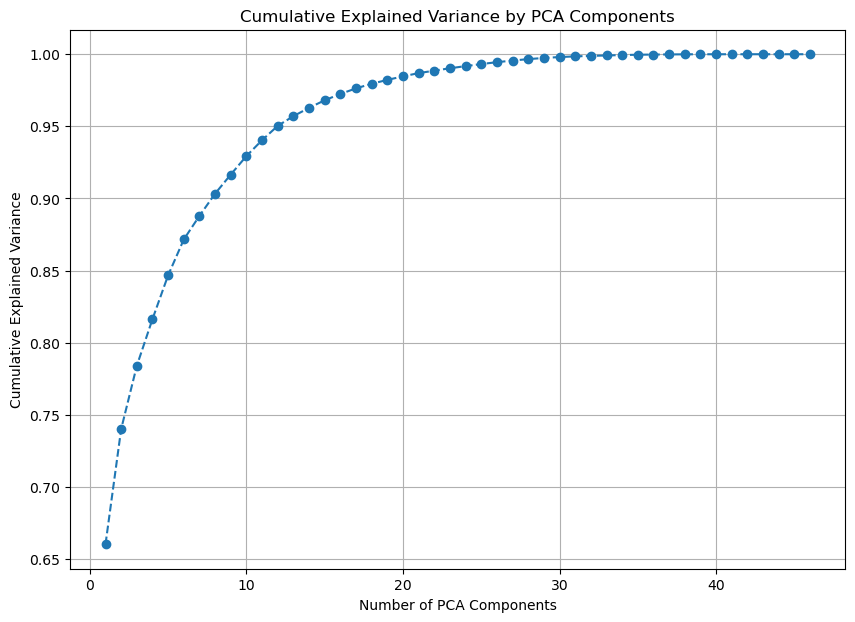

In [75]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(preprocessed_X_train)

cumulative_variances = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variances) + 1), cumulative_variances, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=30)

pca.fit(preprocessed_X_train)

pca_X_train = pca.transform(preprocessed_X_train)
pca_X_test = pca.transform(preprocessed_X_test)

# Summary
The study employed various machine learning models, including ensemble methods, to tackle the regression and classification tasks, striving to achieve the highest possible model performance.

*
The data preprocessing phase revealed a significant challenge: the dataset was highly imbalanced, particularly regarding age distribuonti[1]on. Despite initial attempts to rectify this imbalance through stratified sampling, the approach led to suboptimal performance in classification models due to insufficient training data for less-represented age groups. Consequently, the decision was made t, acknowleedng that it might not be a critical predictoto affect the final resu.**

Another major hurdle encountered was feature select**ion. The dataset contained over 40 features, and while dimensionality reduction via PCA was explored, it ultimately degraded model performance. Instead, a simpler method using permutation importance was employed for feature selection. This choice, albeit practical, hinted at potential limitations in fully leveraging the dataset's informational value.

Despite these challenges, the report de**tails the successful application of machine learning algorithms to predict body temperature and classify fever status, culminating in the use of an ensemble of the best-performing models to enhance prediction acc**uracy. However, the limitations encountered—particularly in addressing sample imbalance and optimizing feature selection—highlight areas for improvement in future stu
An important aspect of our classification task was **managing the trade-off between precision and recall**. Achieving the right balance was critical, especially in medical applications where the cost of false negatives could be high. Our models aimed to optimize this trade-off, ensuring that we could reliably identify fever cases without excessively flagging healthy individuals.
dies.

The insights gained from this analysis underscore the complexity of predictive modeling in healthcare contexts, where data imbalance and feature selection play pivotal roles in model performance. Future research should focus on innovative strategies to overcome these challenges, ensuring more robust and accurate predictive models.

# Reference
[1] Wang, Q., Zhou, Y., Ghassemi, P., McBride, D., Casamento, J. P., & Pfefer, T. J. (2022). Infrared Thermography for Measuring Elevated Body Temperature: Clinical Accuracy, Calibration, and Evaluation. Sensors, 22, 215.

[2] Stamate, D.(2024). Machine Learning Class Code. Goldsmiths, University of London